In [1]:
import sys
sys.path.append('..')
from common import *

In [ ]:
def crop_img_black_parts_horizontaly(img):
    max_x = -1
    for x in range(len(img[0]) - 1, -1, -1):
        if max_x != -1:
            break
        for y in range(len(img)):
            if (img[y, x, :] != 0).any():
                max_x = x
                break
    
    return img[:, 0:max_x, :]

In [2]:
train_img = cv2.imread('img\image1.jpg')
query_img = cv2.imread('img\image2.jpg')

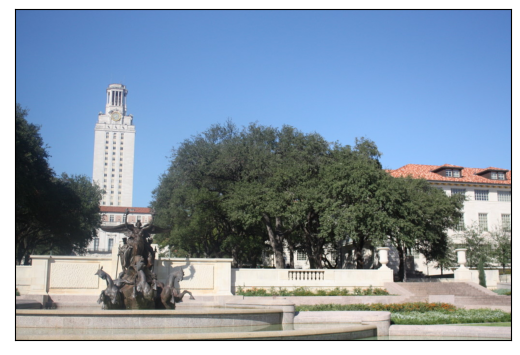

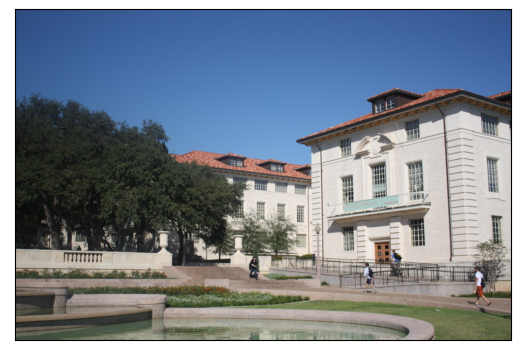

In [3]:
show_image(query_img)
show_image(train_img)

In [4]:
query_kp, query_des = get_image_sift_feature(query_img)
train_kp, train_des = get_image_sift_feature(train_img)

In [5]:
matches = get_matches(query_des, train_des)

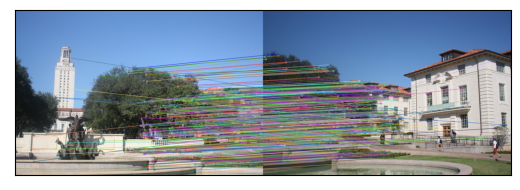

In [6]:
matches_img = cv2.drawMatchesKnn(query_img, query_kp, train_img, train_kp, matches[500:], None, flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
show_image(matches_img)

In [12]:
pts_src = np.array([(query_kp[m[0].queryIdx].pt[0], query_kp[g[0].queryIdx].pt[1]) for m in matches_img])
pts_dst = np.array([(train_kp[m[0].trainIdx].pt[0], train_kp[g[0].trainIdx].pt[1]) for m in matches_img])